## Определение тональности текста отзывов на фильмы IMDB с помощью сети GRU

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Не забудьте подключить GPU, чтобы сеть обучалась быстрее (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

In [0]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Загружаем данные

In [0]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 0s 0us/step


## Подготовка данных для обучения

In [0]:
maxlen = 200

In [0]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [6]:
x_train[5002]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  103,   51,   13,  197,   16,    6, 4796,
        239,    7,  107,  555,   11,  132,   39, 8921, 1872,  138,   16,
       4093, 1768, 2959,   34, 1620,    2,   11,    4,  755,   12,   43,
        286,    4,  172,  209,    2,    5, 5938,   17, 1000,   34, 1768,
        279,   29, 3892,   89,  338,    4,  114,   16, 1240, 1747,  103,
       3844, 3819,    8,  169, 2875,  112, 7062,   34,  160,  132,   29,
        100,   24,  535,  101,  250,    8,  858,   15,  196,   19,   57,
       3154,   39,   90,    5,   24,  169, 3533,   

## Создание нейронной сети

In [0]:
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [9]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 2s 13ms/step - loss: 0.5510 - accuracy: 0.6919 - val_loss: 0.3527 - val_accuracy: 0.8464
Epoch 2/20
176/176 [==============================] - 2s 11ms/step - loss: 0.2705 - accuracy: 0.8891 - val_loss: 0.3112 - val_accuracy: 0.8716
Epoch 3/20
176/176 [==============================] - 2s 11ms/step - loss: 0.1994 - accuracy: 0.9250 - val_loss: 0.3178 - val_accuracy: 0.8732
Epoch 4/20
176/176 [==============================] - 2s 11ms/step - loss: 0.1653 - accuracy: 0.9400 - val_loss: 0.3296 - val_accuracy: 0.8768
Epoch 5/20
176/176 [==============================] - 2s 11ms/step - loss: 0.1321 - accuracy: 0.9544 - val_loss: 0.3718 - val_accuracy: 0.8748
Epoch 6/20
176/176 [==============================] - 2s 11ms/step - loss: 0.1112 - accuracy: 0.9619 - val_loss: 0.4116 - val_accuracy: 0.8672
Epoch 7/20
176/176 [==============================] - 2s 12ms/step - loss: 0.0922 - accuracy: 0.9709 - val_loss: 0.4544 - val_accuracy: 0.8680

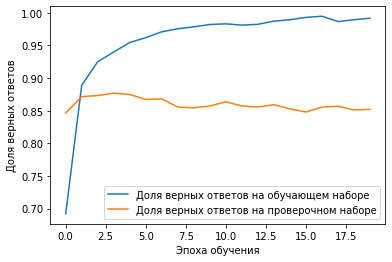

In [10]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [11]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 3s 4ms/step - loss: 0.9855 - accuracy: 0.8309


## Архитектуры нейронных сетей для анализа текстов

1. [Определение тональности отзывов на фильмы из базы IMDB с помощью простых рекуррентных нейросетей](https://colab.research.google.com/drive/19RAxAnIV0fDXAcE1T23TPkzi4ZPFQXdB).
2. [Определение тональности отзывов на фильмы из базы IMDB с помощью сетей LSTM](https://colab.research.google.com/drive/1FQjetRIkWYxmm87JKUbVSJrRS2vNLPpV).
3. [Определение тональности отзывов на фильмы из базы IMDB с помощью сетей GRU](https://colab.research.google.com/drive/1IGJPwFkTdpbyagQ5jiIRJBA01xlfc18t).